<a href="https://colab.research.google.com/github/Stelvlen/MATH-509/blob/main/STAT_509_Final_Project_edition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import os

## Data cleaning process

In [2]:
## Import csv data from github repo
data1 = pd.read_csv('https://raw.githubusercontent.com/Stelvlen/MATH-509/main/application_record.csv?token=GHSAT0AAAAAAB3NB2K7J2XQ77HIYTGHWFPKY3ZOQ6A')
data1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
data2 = pd.read_csv("https://github.com/Stelvlen/MATH-509/raw/5d518153798b041d3def159959a7f6cf372430e4/credit_record(2).csv")
data2

,ID,STATUS
0,5001711,X
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,C
...,...,...
1048570,5150487,C
1048571,5150487,C
1048572,5150487,C
1048573,5150487,C


In [4]:
data3 = pd.read_csv("https://raw.githubusercontent.com/Stelvlen/MATH-509/main/credit_record.csv?token=GHSAT0AAAAAAB3NB2K6K7PX23XTAYJ2G4LSY3ZOTPQ")
data3

,ID,STATUS
0,5001711.0,X
1,5001712.0,0
2,5001713.0,0
3,5001714.0,0
4,5001715.0,C
...,...,...
1048570,NaN,C
1048571,NaN,C
1048572,NaN,C
1048573,NaN,C


In [5]:
data_weight = data2.groupby("ID")["STATUS"].value_counts(normalize=True).to_frame("PROP").reset_index().pivot("ID", "STATUS", "PROP").sort_index()
data_weight

STATUS,0,1,2,3,4,5,C,X
ID,,,,,,,,
5001711,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.25
5001712,0.526316,NaN,NaN,NaN,NaN,NaN,0.473684,NaN
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
...,...,...,...,...,...,...,...,...
5150482,0.666667,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
5150484,0.923077,NaN,NaN,NaN,NaN,NaN,0.076923,NaN


In [6]:
data_weight = data_weight.fillna(0)
SCORE = (5/6 * data_weight["0"] + 4/6 * data_weight["1"] 
    + 0.5 * data_weight["2"] + 2/6 * data_weight["3"] + 1/6 * data_weight["4"] 
+ data_weight["C"] + data_weight["X"])

SCORE.index = data_weight.index
SCORE.name = "SCORE"
SCORE
data3 = data3.merge(SCORE, on ='ID')

In [7]:
data_clean = data1.merge(data3, on='ID', how="inner").dropna()
data_clean

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,SCORE
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,X,0.961111
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,X,0.933333
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,X,1.000000
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,X,0.962963
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,X,0.974359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,C,0.680556
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,C,0.500000
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,C,0.636364
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,C,0.783333


In [8]:
data_clean.loc[data_clean["SCORE"] >= data_clean['SCORE'].quantile(0.5), "STATUS"] = "good"
data_clean.loc[data_clean["SCORE"] <  data_clean['SCORE'].quantile(0.5), "STATUS"] = "bad"

In [9]:
data_clean['STATUS'].value_counts(normalize=True)
data_clean.reset_index(drop=True, inplace=True)
# Mojority class baseline 

good    12568
bad     12566
Name: STATUS, dtype: int64


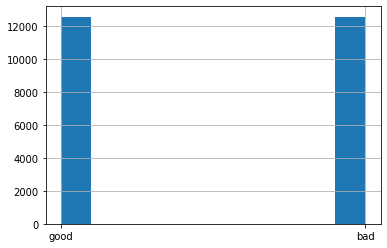

In [10]:
print(data_clean['STATUS'].value_counts())
data_clean['STATUS'].hist()

In [11]:
## Convert negative employed days to positive. As an result, unemployed population are marked as 0.
for i in range(len(data_clean['DAYS_EMPLOYED'])):
  if data_clean['DAYS_EMPLOYED'][i]>=0:
    data_clean['DAYS_EMPLOYED'][i]=0
  else:
    data_clean['DAYS_EMPLOYED'][i]=data_clean['DAYS_EMPLOYED'][i]*-1


<ipython-input-11-c5122ff24a2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['DAYS_EMPLOYED'][i]=data_clean['DAYS_EMPLOYED'][i]*-1


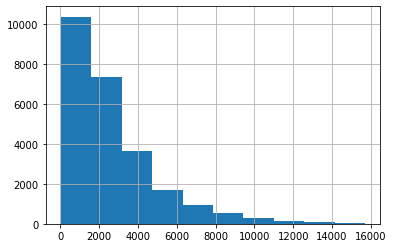

In [12]:
data_clean['DAYS_EMPLOYED'].hist()

In [13]:
## Convert negative # days of birth to positive.
for i in range (len(data_clean['DAYS_BIRTH'])):
  data_clean['DAYS_BIRTH'][i]=data_clean['DAYS_BIRTH'][i]*-1

<ipython-input-13-23a0d3b2dcf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['DAYS_BIRTH'][i]=data_clean['DAYS_BIRTH'][i]*-1


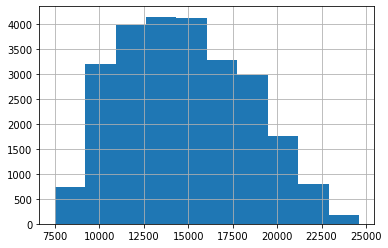

In [14]:
data_clean['DAYS_BIRTH'].hist()

In [15]:
## Convert object varables with more than 2 responses into categorical variables.
data_clean['NAME_INCOME_TYPE'] = data_clean['NAME_INCOME_TYPE'].astype('category')
data_clean['NAME_EDUCATION_TYPE'] = data_clean['NAME_EDUCATION_TYPE'].astype('category')
data_clean['NAME_FAMILY_STATUS'] = data_clean['NAME_FAMILY_STATUS'].astype('category')
data_clean['NAME_HOUSING_TYPE'] = data_clean['NAME_HOUSING_TYPE'].astype('category')
data_clean['OCCUPATION_TYPE'] = data_clean['OCCUPATION_TYPE'].astype('category')

In [16]:
data_clean.dtypes

ID                        int64
CODE_GENDER              object
FLAG_OWN_CAR             object
FLAG_OWN_REALTY          object
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
STATUS                   object
SCORE                   float64
dtype: object

In [17]:
## Convert object varables with only 2 responses into integer64 variables.
data_clean['CODE_GENDER'].replace('M', 0, inplace=True)
data_clean['CODE_GENDER'].replace('F', 1, inplace=True)
data_clean['FLAG_OWN_CAR'].replace('Y', 0, inplace=True)
data_clean['FLAG_OWN_CAR'].replace('N', 1, inplace=True)
data_clean['FLAG_OWN_REALTY'].replace('Y', 0, inplace=True)
data_clean['FLAG_OWN_REALTY'].replace('N', 1, inplace=True)
data_clean['STATUS'].replace('bad', 0, inplace=True)
data_clean['STATUS'].replace('good', 1, inplace=True)
data_clean.dtypes

ID                        int64
CODE_GENDER               int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
STATUS                    int64
SCORE                   float64
dtype: object

In [18]:
data_clean['WORK_AGE_RATIO'] = data_clean['DAYS_EMPLOYED']/data_clean['DAYS_BIRTH']

In [19]:
corr = data_clean.corr()
corr.loc['STATUS'].abs().sort_values()

CNT_CHILDREN        0.001110
CODE_GENDER         0.003712
DAYS_BIRTH          0.004806
CNT_FAM_MEMBERS     0.007239
FLAG_PHONE          0.007381
FLAG_EMAIL          0.010605
AMT_INCOME_TOTAL    0.013047
DAYS_EMPLOYED       0.013223
FLAG_OWN_REALTY     0.015760
ID                  0.017709
FLAG_WORK_PHONE     0.019938
FLAG_OWN_CAR        0.020580
WORK_AGE_RATIO      0.022333
SCORE               0.822286
STATUS              1.000000
FLAG_MOBIL               NaN
Name: STATUS, dtype: float64

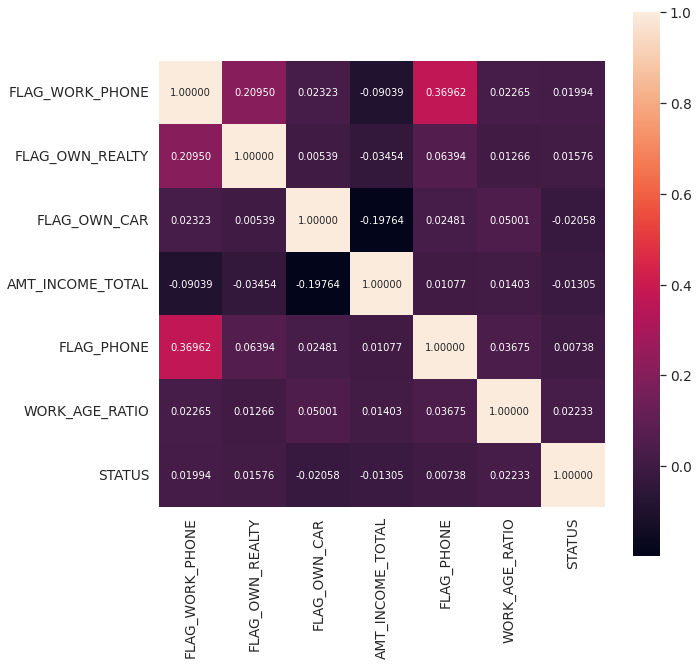

In [20]:
plt.figure(figsize=(10, 10))
columns = ['FLAG_WORK_PHONE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 
           'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'WORK_AGE_RATIO', 'STATUS']
corr_matrix = data_clean[columns].corr()
sns.set(font_scale = 1.25)
heat_map = sns.heatmap(corr_matrix, cbar=True, annot=True, square= True, fmt='.5f',
                      annot_kws={'size':10}, yticklabels=columns,
                      xticklabels=columns)
plt.show()

In [21]:
data_clean2=copy.deepcopy(data_clean)
data_clean2 = data_clean2[['FLAG_WORK_PHONE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 
                  'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'WORK_AGE_RATIO', 
                  'STATUS']]

In [23]:
columns = ['AMT_INCOME_TOTAL', 'WORK_AGE_RATIO']
data_clean2[columns] = (data_clean2[columns] - data_clean2[columns].mean())/data_clean2[columns].std()
data_clean2

,FLAG_WORK_PHONE,FLAG_OWN_REALTY,FLAG_OWN_CAR,AMT_INCOME_TOTAL,FLAG_PHONE,WORK_AGE_RATIO,STATUS
0,0,0,0,-0.787801,0,-0.892395,1
1,0,0,1,0.719218,1,-0.105656,1
2,0,0,1,0.719218,1,-0.105656,1
3,0,0,1,0.719218,1,-0.105656,1
4,0,0,1,0.719218,1,-0.105656,1
...,...,...,...,...,...,...,...
25129,0,0,0,1.149794,0,-0.254079,0
25130,0,0,1,-0.357224,1,-0.493609,0
25131,0,0,1,-0.357224,1,-0.493609,0
25132,0,0,1,0.848391,0,-1.012667,0


## Spliting training and testing cases in our analysis

In [25]:
x = data_clean2.copy().drop(columns=['STATUS'])
y = data_clean2[['STATUS']]
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=100)

In [26]:
data_clean2['STATUS'].value_counts(normalize = True)

1    0.50004
0    0.49996
Name: STATUS, dtype: float64

## Logistic regression classification

In [27]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(C=1,
                           random_state=0,
                           solver='lbfgs')
model_lg.fit(x_training, y_training)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, random_state=0)

In [28]:
y_predict_lg_train = model_lg.predict(x_training)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_training, y_predict_lg_train)))
print(pd.DataFrame(confusion_matrix(y_training,y_predict_lg_train)))

Accuracy Score is 0.51768
      0     1
0  5429  4624
1  5074  4980


In [29]:
y_predict_lg_test = model_lg.predict(x_testing)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_lg_test)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_lg_test)))

Accuracy Score is 0.51104
      0     1
0  1344  1169
1  1289  1225


In [30]:
print(classification_report(y_testing,y_predict_lg_test))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      2513
           1       0.51      0.49      0.50      2514

    accuracy                           0.51      5027
   macro avg       0.51      0.51      0.51      5027
weighted avg       0.51      0.51      0.51      5027



## Decision Tree

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_training, y_training)


DecisionTreeClassifier()

In [34]:
y_predict_dt_train = model_dt.predict(x_training)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_training, y_predict_dt_train)))
print(pd.DataFrame(confusion_matrix(y_training,y_predict_dt_train)))

Accuracy Score is 0.80196
      0     1
0  8359  1694
1  2288  7766


In [36]:
y_predict_dt_test = model_dt.predict(x_testing)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_dt_test)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_dt_test)))

Accuracy Score is 0.65566
      0     1
0  1734   779
1   952  1562


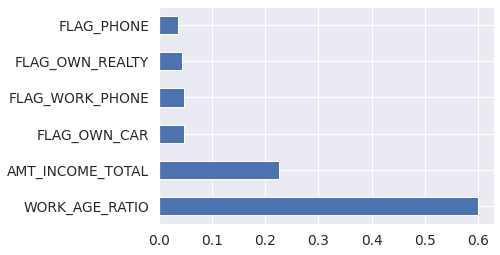

In [37]:
dt_importances = pd.Series(model_dt.feature_importances_,index=x_training.columns)
dt_importances.nlargest(20).plot(kind='barh')

In [38]:
print(classification_report(y_testing,y_predict_dt_test))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      2513
           1       0.67      0.62      0.64      2514

    accuracy                           0.66      5027
   macro avg       0.66      0.66      0.66      5027
weighted avg       0.66      0.66      0.66      5027



## Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model_rf = RandomForestClassifier(random_state = 1, n_estimators=500, 
                                  max_depth=50,min_samples_leaf=2)
model_rf.fit(x_training,y_training)

<ipython-input-39-12444c7d0bb6>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_training,y_training)


RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=500,
                       random_state=1)

In [40]:
y_predict_rf_train = model_rf.predict(x_training)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_training, y_predict_rf_train)))
print(pd.DataFrame(confusion_matrix(y_training,y_predict_rf_train)))

Accuracy Score is 0.78709
      0     1
0  7780  2273
1  2008  8046


In [41]:
y_predict_rf_test = model_rf.predict(x_testing)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_rf_test)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_rf_test)))

Accuracy Score is 0.65168
      0     1
0  1607   906
1   845  1669


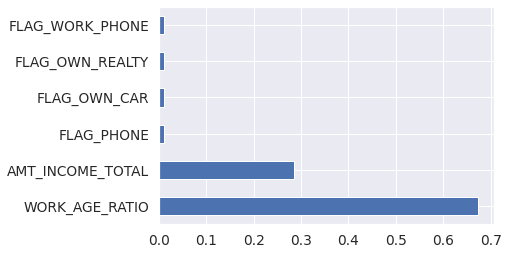

In [42]:
rf_importances = pd.Series(model_rf.feature_importances_,index=x_training.columns)
rf_importances.nlargest(20).plot(kind='barh')

## Neural network


In [43]:
from sklearn.neural_network import MLPClassifier

model_nw = MLPClassifier((100, 100, 100), random_state=1)
model_nw.fit(x_training, y_training)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=1)

In [44]:
y_predict_nw_train = model_nw.predict(x_training)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_training, y_predict_nw_train)))
print(pd.DataFrame(confusion_matrix(y_training,y_predict_nw_train)))

Accuracy Score is 0.63978
      0     1
0  6222  3831
1  3412  6642


In [45]:
y_predict_nw_test = model_nw.predict(x_testing)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_nw_test)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_nw_test)))

Accuracy Score is 0.58544
      0     1
0  1407  1106
1   978  1536


In [46]:
print(classification_report(y_testing,y_predict_nw_test))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57      2513
           1       0.58      0.61      0.60      2514

    accuracy                           0.59      5027
   macro avg       0.59      0.59      0.59      5027
weighted avg       0.59      0.59      0.59      5027



## Support Vector Machine

In [47]:
from sklearn import svm

model_svc = svm.SVC(random_state=1)
model_svc.fit(x_training, y_training)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=1)

In [48]:
y_predict_svc_train = model_svc.predict(x_training)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_training, y_predict_svc_train)))
print(pd.DataFrame(confusion_matrix(y_training,y_predict_svc_train)))

Accuracy Score is 0.54439
      0     1
0  5815  4238
1  4923  5131


In [49]:
y_predict_svc_test = model_svc.predict(x_testing)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_svc_test)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_svc_test)))

Accuracy Score is 0.52954
      0     1
0  1403  1110
1  1255  1259


In [50]:
"""
data_clean2.to_csv('credit.csv')
from google.colab import files
files.download("credit.csv")
"""

'\ndata_clean2.to_csv(\'credit.csv\')\nfrom google.colab import files\nfiles.download("credit.csv")\n'